In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df = pd.read_csv('/content/drive/MyDrive/CustomerChurn.csv')

In [100]:
# First 5 rows
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Last 5 rows
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
#Checking datatypes of all columns
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Senior citizen is actually a categorical column.

75% of the Customers have a tenure less than 55months.

25% of the Average Customers Monthly Charges greater than $89.

Average Customers Monthly Charges is $64.761692

Text(0.5, 1.0, 'Count of Target Variable per Category')

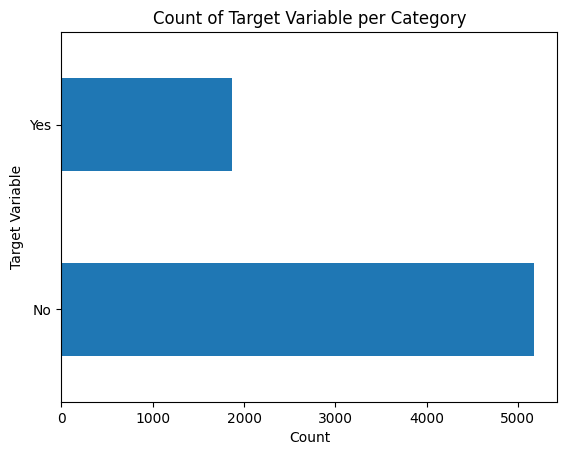

In [101]:
df['Churn'].value_counts().plot(kind='barh')
plt.xlabel("Count")
plt.ylabel("Target Variable")
plt.title("Count of Target Variable per Category")

In [102]:
df['Churn'].value_counts()*100/len(df['Churn'])

,count
Churn,
No,73.463013
Yes,26.536987


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [104]:
missing_percent = 100*df.isnull().sum()/len(df)
missing_percent

,0
customerID,0.0
gender,0.0
SeniorCitizen,0.0
Partner,0.0
Dependents,0.0
tenure,0.0
PhoneService,0.0
MultipleLines,0.0
InternetService,0.0
OnlineSecurity,0.0


In [105]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

# Plot
if not missing.empty:
    # Plot
    #plt.figure(figsize=(10, 6))
    missing.plot(kind='barh', color='blue')
    plt.xlabel('Number of Missing Values')
    plt.ylabel('Columns')
    plt.title('Missing Values per Column')
    plt.gca().invert_yaxis()  # To show largest bar on top
    plt.show()
else:
    print("No missing values found in the DataFrame.")

No missing values found in the DataFrame.


Missing Data - Initial Intuition


*  Here, we don't have any missing data.



# Data Cleaning

1. Copy of the Dataframe

In [106]:
new_df = df.copy()

2. Changing the datatype of the TotalCharges to numeric.

In [107]:
new_df['TotalCharges'] = pd.to_numeric(new_df['TotalCharges'], errors='coerce')

3. We can see there are 11 null values.

In [108]:
new_df['TotalCharges'].isnull().sum()

np.int64(11)

# 4.  Missing Value treatment

 It is only 0.15% are null value. So, it is safe to ignore.

In [109]:
new_df.dropna(subset=['TotalCharges'], inplace=True)

 5. Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [92]:
print("Minimum Month for Tenure:",new_df['tenure'].min())
print("Maximum Month for Tenure:",new_df['tenure'].max())

Minimum Month for Tenure: 1
Maximum Month for Tenure: 72


In [95]:
labels = ["{0} - {1}".format(i,i+11) for i in range(1,72,12)]
bins = range(1,80,12)
new_df['Tenure_Groups'] = pd.cut(new_df.tenure,bins=bins,labels=labels,right=False)
new_df.Tenure_Groups.value_counts()

,count
Tenure_Groups,
1 - 12,2175
61 - 72,1407
13 - 24,1024
25 - 36,832
49 - 60,832
37 - 48,762


6. Remove Columns not required.

In [111]:
new_df.drop(['customerID'],axis=1,inplace=True)
new_df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Exploration

**Univariate Analysis**

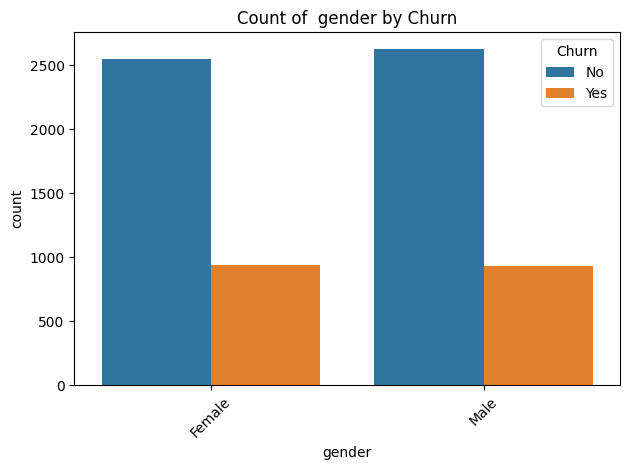

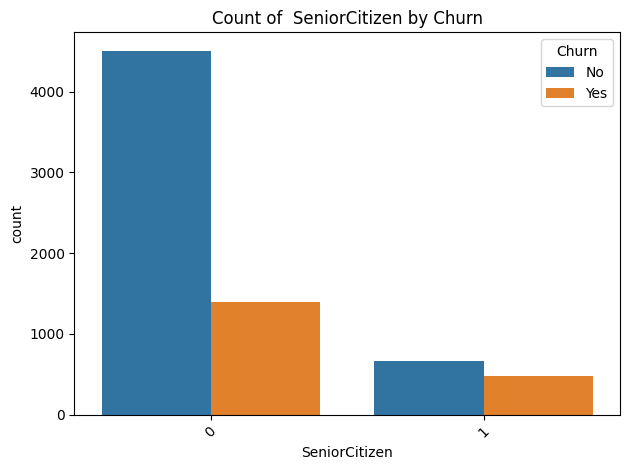

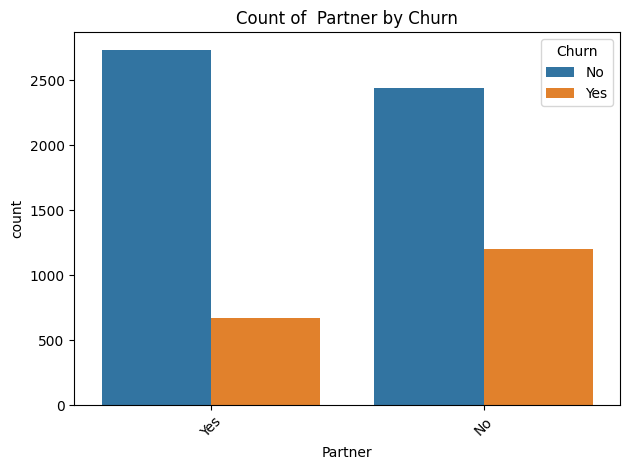

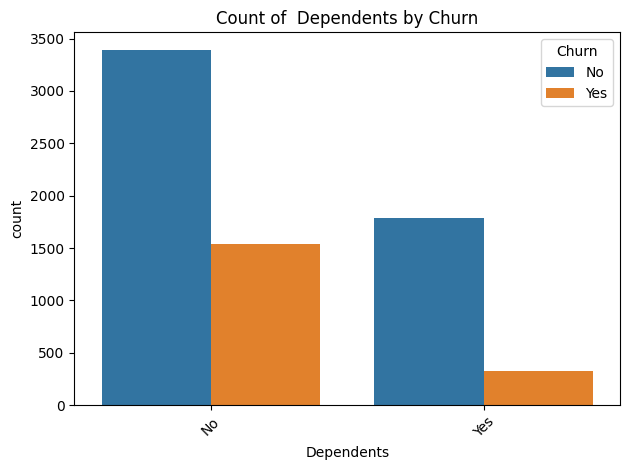

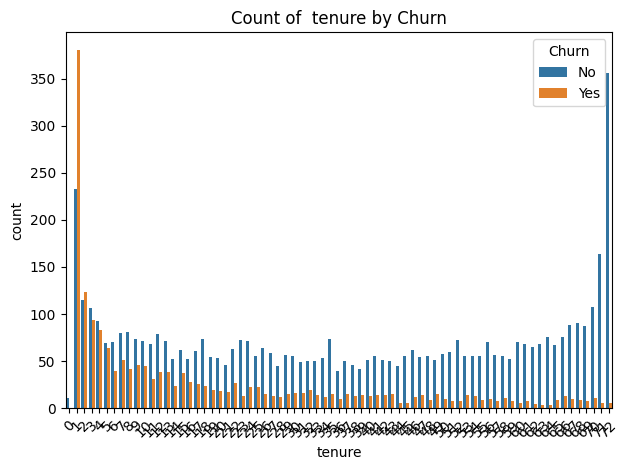

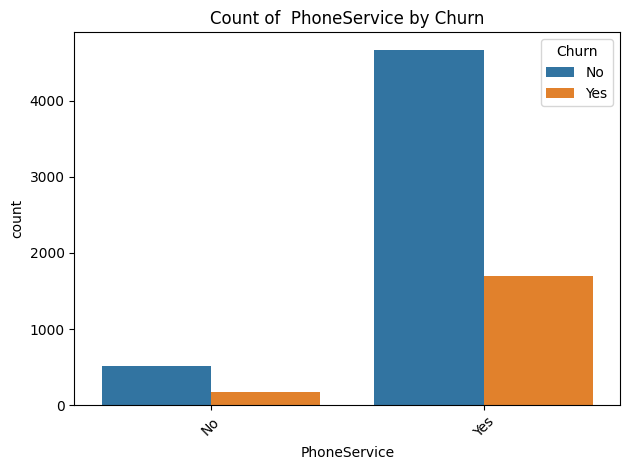

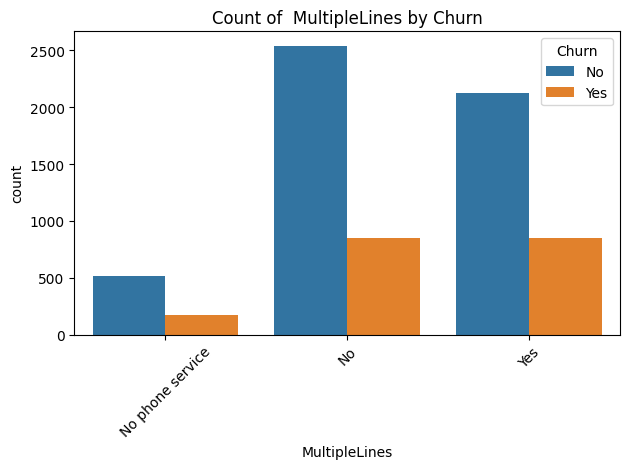

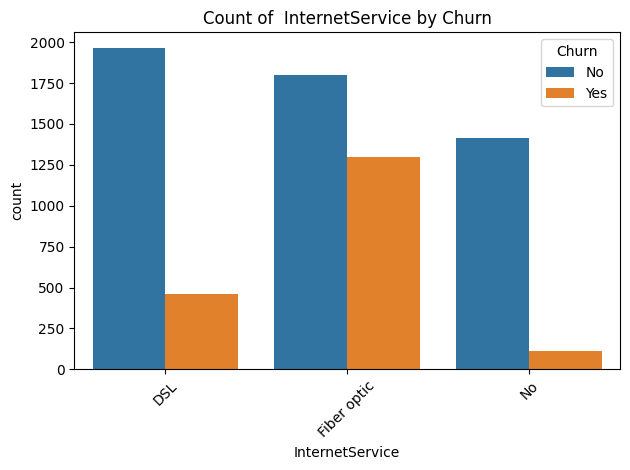

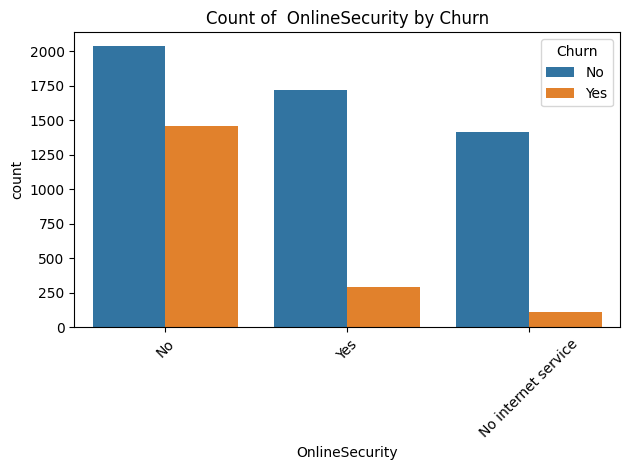

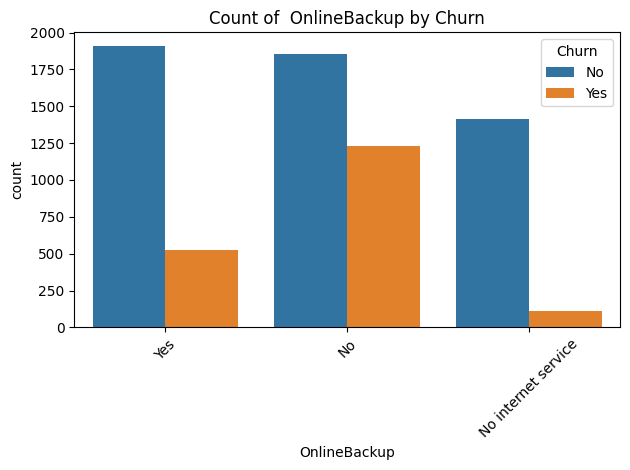

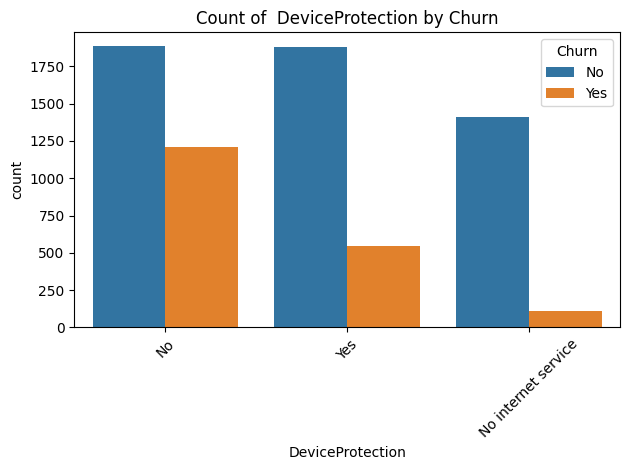

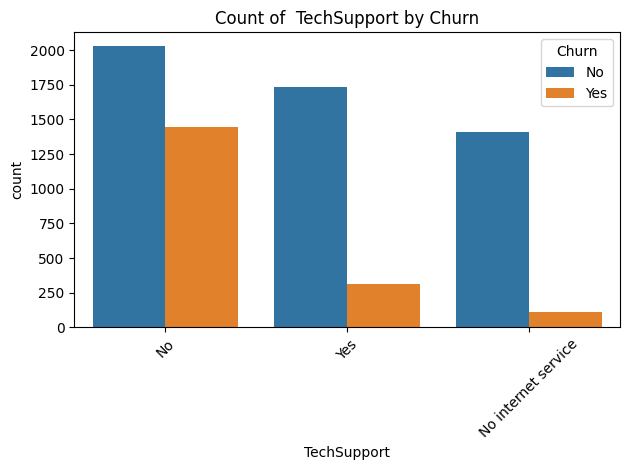

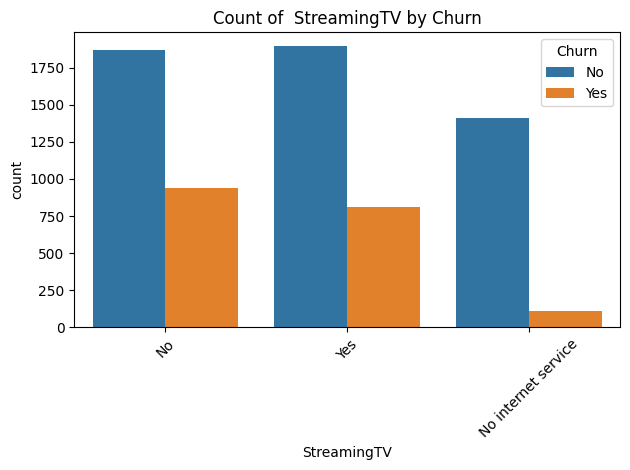

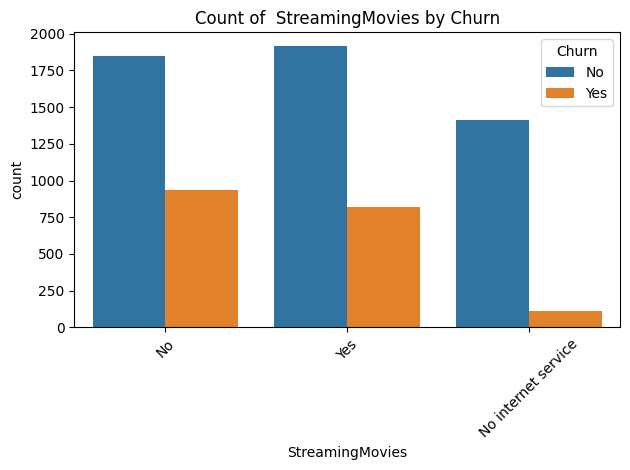

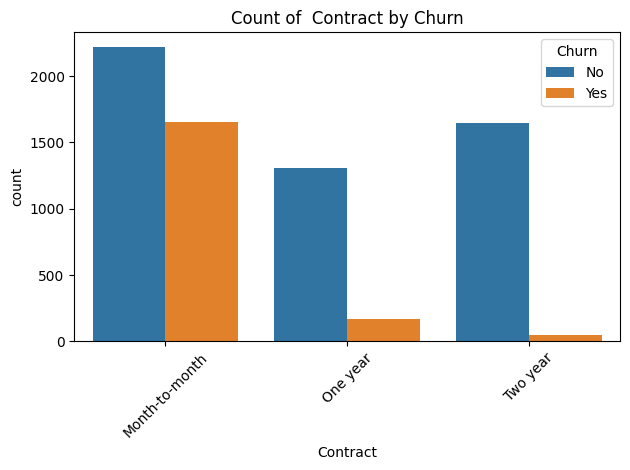

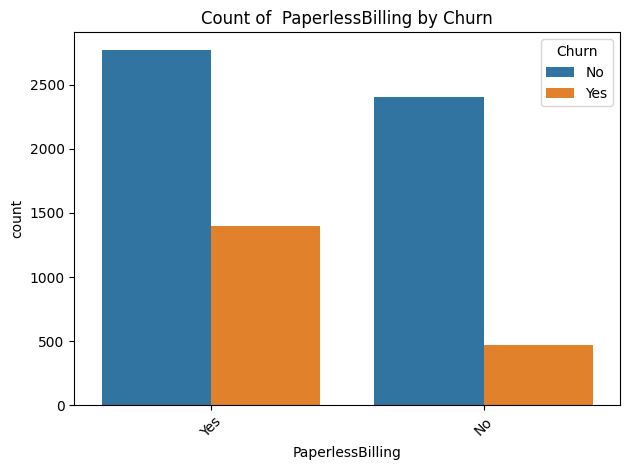

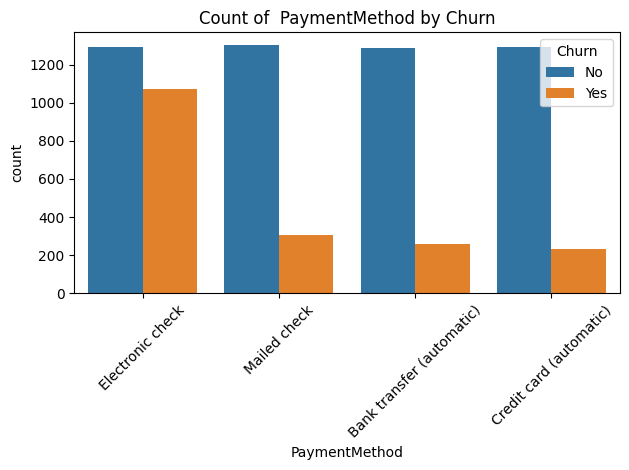

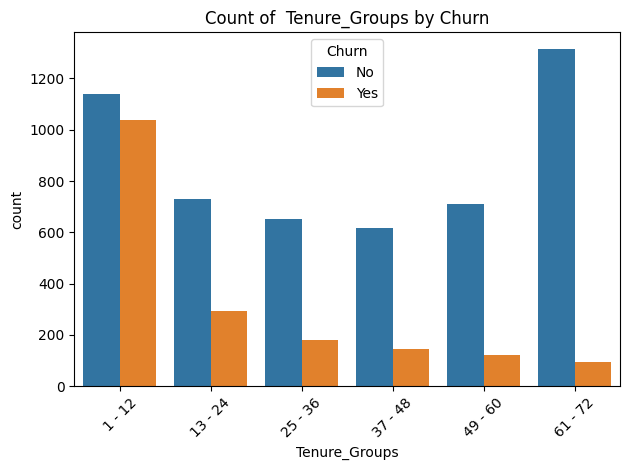

In [68]:
for i, predictor in enumerate(new_df.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=new_df,x=predictor,hue='Churn')
    plt.title(f"Count of  {predictor} by Churn")
    plt.xticks(rotation=45)  # rotate x-labels if categories are long
    plt.tight_layout()
    plt.show()

2.Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [112]:
new_df['Churn'] = np.where(new_df.Churn == 'Yes',1,0)
new_df.head(5)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


3.

In [113]:
new_df_dummy = pd.get_dummies(new_df)
new_df_dummy.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


Relationship between Total Charges and Monthly Charges

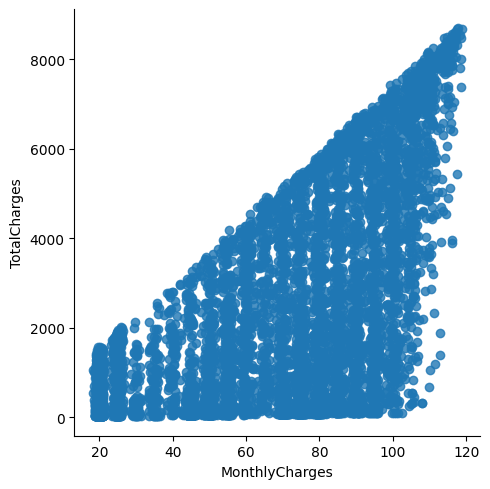

In [114]:
sns.lmplot(data=new_df_dummy, x='MonthlyCharges', y='TotalCharges', fit_reg=False)
plt.show()


It shows when Monthly Charges increase Total Charges also increases.

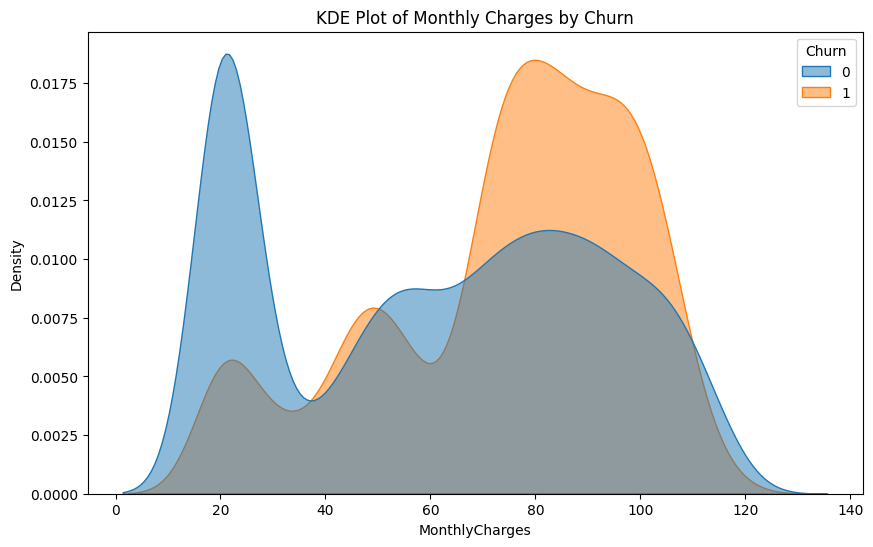

In [118]:


plt.figure(figsize=(10,6))
sns.kdeplot(data=new_df_dummy, x='MonthlyCharges', hue='Churn', fill=True, common_norm=False, alpha=0.5)
plt.title('KDE Plot of Monthly Charges by Churn')
plt.show()


# This plot suggested that Churn is high when Monthly Charges are high.

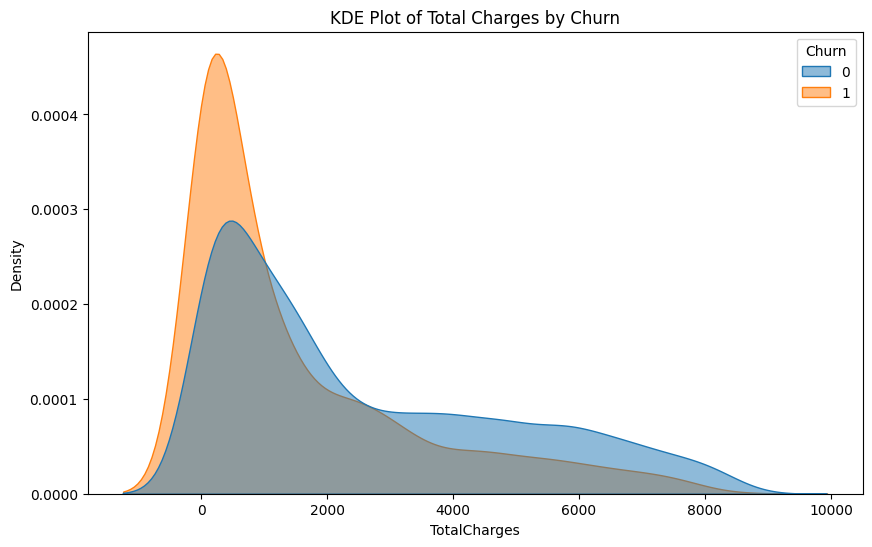

In [119]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=new_df_dummy, x='TotalCharges', hue='Churn', fill=True, common_norm=False, alpha=0.5)
plt.title('KDE Plot of Total Charges by Churn')
plt.show()

# This plot suggested that Churn is High when Total Charges are low.

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linked to High Churn.

In [131]:
churners = new_df[new_df['Churn'] == 1]
non_churners = new_df[new_df['Churn'] == 0]

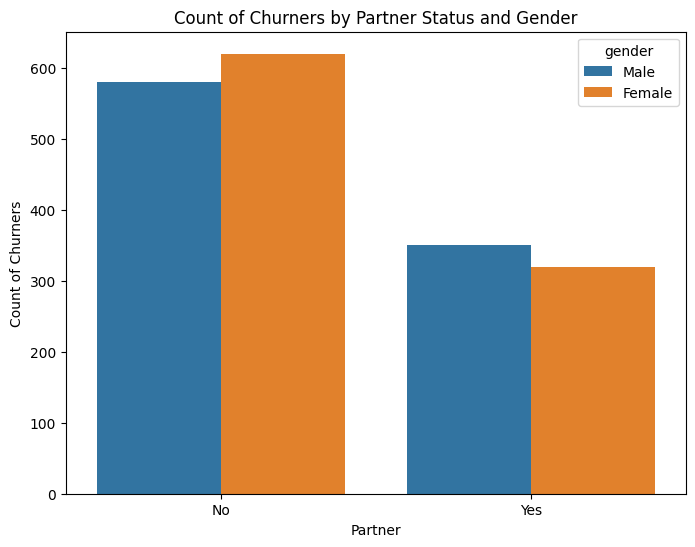

In [132]:

plt.figure(figsize=(8,6))
sns.countplot(data=churners, x='Partner', hue='gender')  # assuming columns are 'Partner' and 'gender'

plt.title('Count of Churners by Partner Status and Gender')
plt.xlabel('Partner')
plt.ylabel('Count of Churners')
plt.show()


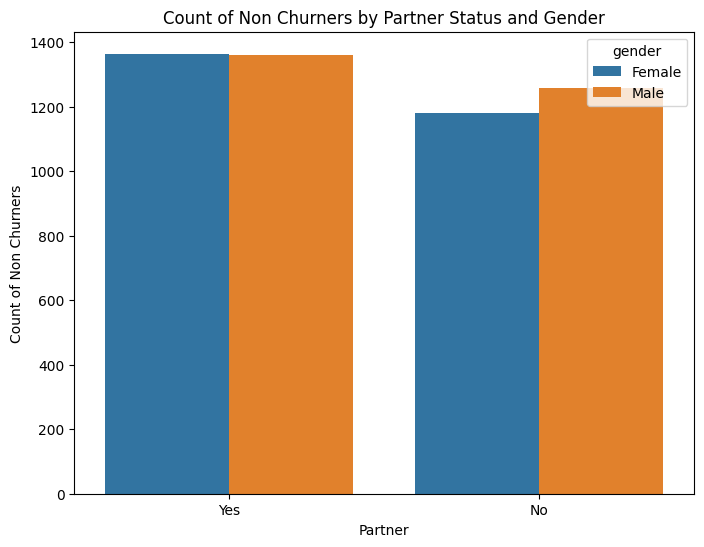

In [133]:

plt.figure(figsize=(8,6))
sns.countplot(data=non_churners, x='Partner', hue='gender')  # assuming columns are 'Partner' and 'gender'

plt.title('Count of Non Churners by Partner Status and Gender')
plt.xlabel('Partner')
plt.ylabel('Count of Non Churners')
plt.show()

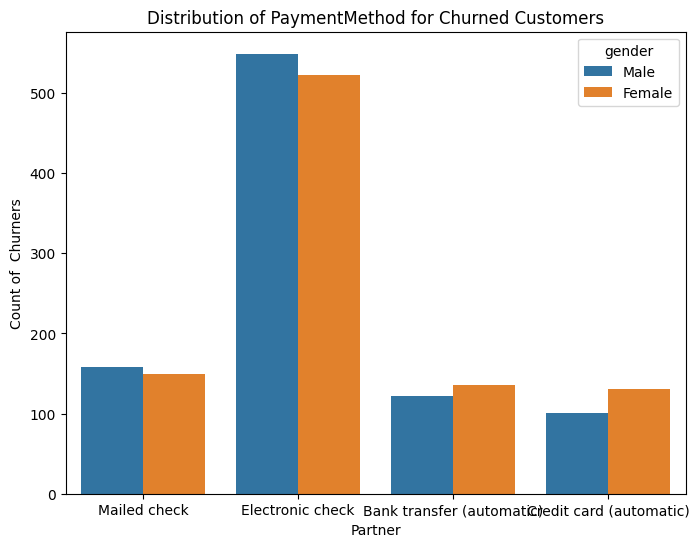

In [136]:

plt.figure(figsize=(8,6))
sns.countplot(data=churners, x='PaymentMethod', hue='gender')  # assuming columns are 'Partner' and 'gender'

plt.title('Distribution of PaymentMethod for Churned Customers')
plt.xlabel('Partner')
plt.ylabel('Count of  Churners')
plt.show()

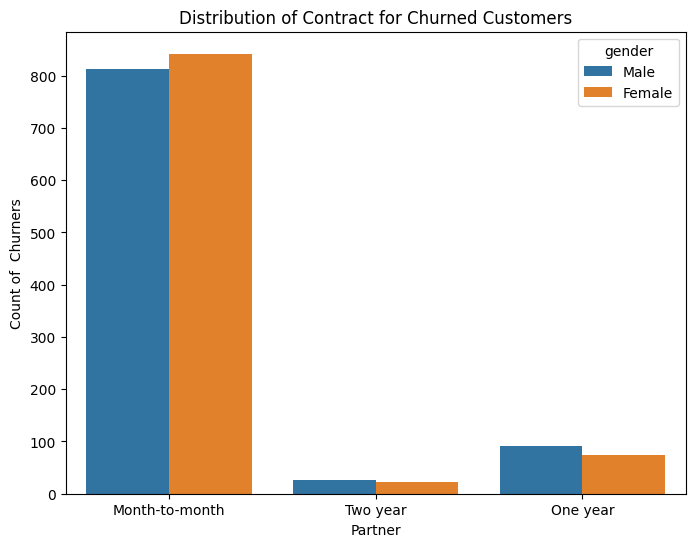

In [138]:
plt.figure(figsize=(8,6))
sns.countplot(data=churners, x='Contract', hue='gender')  # assuming columns are 'Partner' and 'gender'

plt.title('Distribution of Contract for Churned Customers')
plt.xlabel('Partner')
plt.ylabel('Count of  Churners')
plt.show()


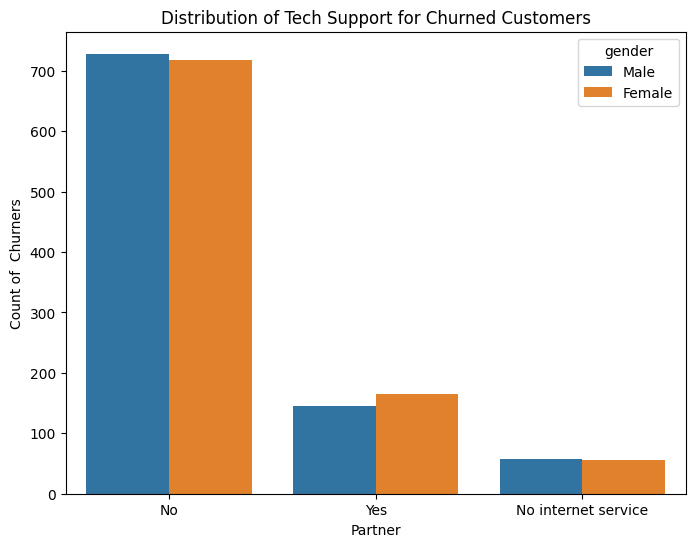

In [139]:
plt.figure(figsize=(8,6))
sns.countplot(data=churners, x='TechSupport', hue='gender')  # assuming columns are 'Partner' and 'gender'

plt.title('Distribution of Tech Support for Churned Customers')
plt.xlabel('Partner')
plt.ylabel('Count of  Churners')
plt.show()

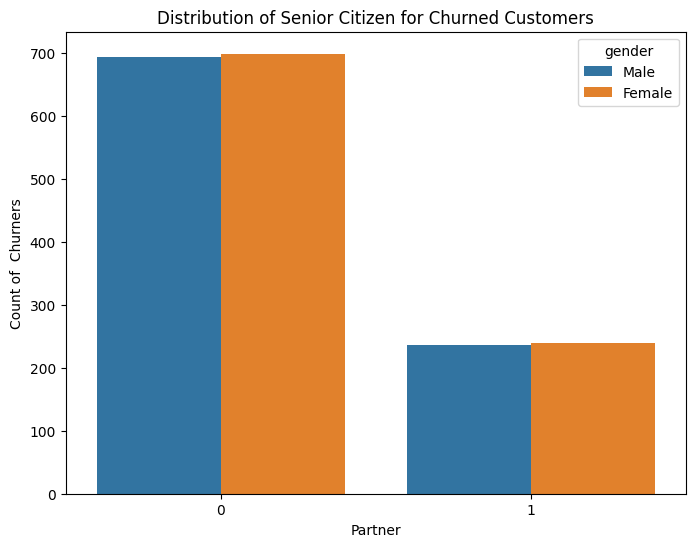

In [140]:
plt.figure(figsize=(8,6))
sns.countplot(data=churners, x='SeniorCitizen', hue='gender')  # assuming columns are 'Partner' and 'gender'

plt.title('Distribution of Senior Citizen for Churned Customers')
plt.xlabel('Partner')
plt.ylabel('Count of  Churners')
plt.show()

# CONCLUSION
These are some of the quick insights from this exercise:

1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners.
4. Non senior Citizens are high churners.